In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
from sklearn.model_selection import train_test_split
from rdkit.Chem import Descriptors
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [302]:
#Считывание датасета
xlsx = pd.ExcelFile('1400.xlsx')
df1 = pd.read_excel(xlsx, 'Smile-IC50-CC50')
df2 = pd.read_excel(xlsx, 'Structures-ADMET')
df2.head()

,molecule,Pictures,SMILES,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,#stars,#amine,#amidine,#acid,...,PSA,#NandO,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Unnamed: 55,Unnamed: 56
0,1007-Ya-213,50.0,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.7,500.0,185.185185,2.0,0.0,0.0,0.0,...,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,NaN
1,1007-Ya-213,51.0,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,0.7,447.0,638.571429,2.0,0.0,0.0,0.0,...,35.245,2.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,NaN
2,1008-Ya-187,52.0,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,9.9,144.0,14.545455,2.0,1.0,0.0,0.0,...,17.981,2.0,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN
3,1009-As-106,53.0,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,8.3,500.0,60.240964,3.0,1.0,0.0,0.0,...,18.821,2.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN
4,1010-Ya-208,54.0,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,39.4,143.0,3.629442,1.0,1.0,0.0,0.0,...,36.035,3.0,0.0,0.0,0.0,0.0,0.0,17.0,NaN,NaN


In [155]:
df1.head()

,Title,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,Pictures
0,1007-Ya-213,2.7,500.0,185.185185,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,50.0
1,1007-Ya-213,0.7,447.0,638.571429,195.307,2,1,32.59,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,51.0
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1,0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,52.0
3,1009-As-106,8.3,500.0,60.240964,222.377,1,0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,53.0
4,1010-Ya-208,39.4,143.0,3.629442,239.361,2,0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,54.0


In [156]:
df1.columns

Index(['Title', 'IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', 'Molecular weight',
       'Hydrogen bond acceptors', 'Hydrogen bond donors', 'Polar SA', 'SMILES',
       'Pictures'],
      dtype='object')

In [303]:
df_merg = pd.concat([df2, df1.drop(['Title', 'IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI','SMILES',
       'Pictures'], axis = 1)], axis = 1)

In [158]:
df_merg

,molecule,Pictures,SMILES,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,#stars,#amine,#amidine,#acid,...,#in34,#in56,#noncon,#nonHatm,Unnamed: 55,Unnamed: 56,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA
0,1007-Ya-213,50.0,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.7,500.0,185.185185,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14.0,NaN,NaN,195.307,2,1,32.59
1,1007-Ya-213,51.0,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,0.7,447.0,638.571429,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14.0,NaN,NaN,195.307,2,1,32.59
2,1008-Ya-187,52.0,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,9.9,144.0,14.545455,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,18.0,NaN,NaN,250.431,1,0,15.60
3,1009-As-106,53.0,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,8.3,500.0,60.240964,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,16.0,NaN,NaN,222.377,1,0,15.60
4,1010-Ya-208,54.0,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,39.4,143.0,3.629442,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,17.0,NaN,NaN,239.361,2,0,29.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,CHEMBL4251117,NaN,CCCCCCCc1c(OC)c(C)c(=O)oc1,7.3,530.6,72.800000,1.0,0.0,0.0,0.0,...,0.0,6.0,0.0,17.0,NaN,NaN,238.330,3,0,39.44
1464,CHEMBL4217515,NaN,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,3.8,4733.9,1250.000000,0.0,0.0,0.0,2.0,...,0.0,22.0,0.0,32.0,NaN,NaN,427.417,2,1,124.74
1465,CHEMBL4205814,NaN,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,0.3,4733.9,14285.700000,0.0,0.0,0.0,2.0,...,0.0,22.0,0.0,32.0,NaN,NaN,427.417,2,1,124.74
1466,CHEMBL4212064,NaN,c1ccc(C([O-])=O)c(c1C([O-])=O)-c(c2)ccc(c23)cc...,0.7,3662.8,5555.600000,0.0,0.0,0.0,2.0,...,0.0,16.0,0.0,24.0,NaN,NaN,320.304,1,0,89.49


In [304]:
df_merg.isna().sum()

molecule                      0
Pictures                    741
SMILES                        0
IC50, mmg/ml                  0
CC50-MDCK, mmg/ml             0
                           ... 
Unnamed: 56                1466
Molecular weight              0
Hydrogen bond acceptors       0
Hydrogen bond donors          0
Polar SA                      0
Length: 61, dtype: int64

In [305]:
df = df_merg.drop(['Pictures', 'Unnamed: 55','Unnamed: 56'], axis = 1)
df.head()

,molecule,SMILES,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,#stars,#amine,#amidine,#acid,#amide,...,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA
0,1007-Ya-213,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,2.7,500.0,185.185185,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,195.307,2,1,32.59
1,1007-Ya-213,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,0.7,447.0,638.571429,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,195.307,2,1,32.59
2,1008-Ya-187,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,9.9,144.0,14.545455,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.0,250.431,1,0,15.60
3,1009-As-106,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,8.3,500.0,60.240964,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,222.377,1,0,15.60
4,1010-Ya-208,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,39.4,143.0,3.629442,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17.0,239.361,2,0,29.54


In [306]:
df = df.dropna(subset=['CNS'])
df.isna().sum()

molecule                       0
SMILES                         0
IC50, mmg/ml                   0
CC50-MDCK, mmg/ml              0
SI                            23
#stars                         0
#amine                         0
#amidine                       0
#acid                          0
#amide                         0
#rotor                         0
#rtvFG                         0
CNS                            0
mol_MW                         0
dipole                         0
SASA                           0
FOSA                           0
FISA                           0
PISA                           0
WPSA                           0
volume                         0
donorHB                        0
accptHB                        0
dip^2/V                        0
ACxDN^.5/SA                    0
glob                           0
QPpolrz                        0
QPlogPC16                      0
QPlogPoct                      0
QPlogPw                        0
QPlogPo/w 

In [307]:
df = df.dropna(subset=["SI"])
df.isna().sum()

molecule                      0
SMILES                        0
IC50, mmg/ml                  0
CC50-MDCK, mmg/ml             0
SI                            0
#stars                        0
#amine                        0
#amidine                      0
#acid                         0
#amide                        0
#rotor                        0
#rtvFG                        0
CNS                           0
mol_MW                        0
dipole                        0
SASA                          0
FOSA                          0
FISA                          0
PISA                          0
WPSA                          0
volume                        0
donorHB                       0
accptHB                       0
dip^2/V                       0
ACxDN^.5/SA                   0
glob                          0
QPpolrz                       0
QPlogPC16                     0
QPlogPoct                     0
QPlogPw                       0
QPlogPo/w                     0
QPlogS  

#### Поиск дубликатов

In [308]:
df = df.drop_duplicates (subset=['SMILES'])

In [309]:
duplicateRows = df[df.duplicated(['SMILES'])]
duplicateRows

,molecule,SMILES,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,#stars,#amine,#amidine,#acid,#amide,...,RuleOfFive,#ringatoms,#in34,#in56,#noncon,#nonHatm,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA


### Анализ выбросов

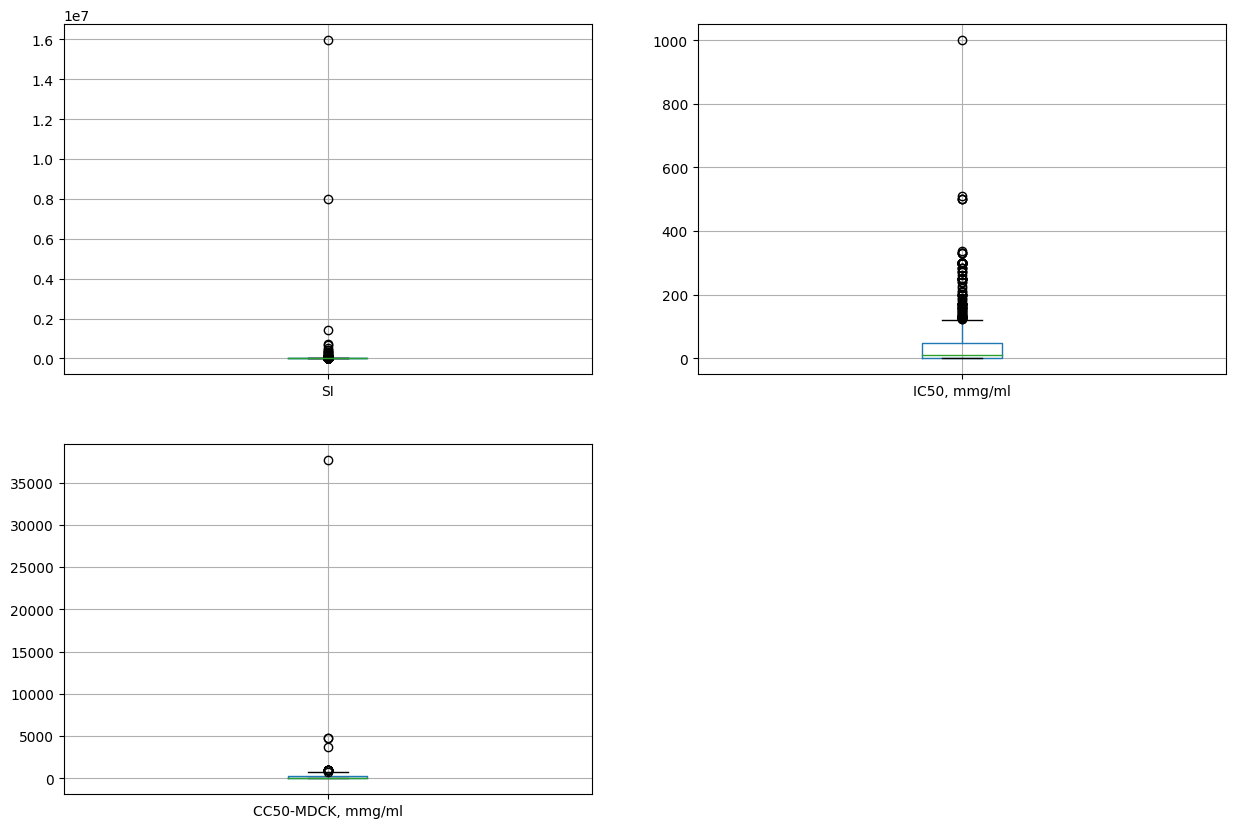

In [310]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
ax = df.boxplot(['SI'])
plt.subplot(2,2,2)
ax = df.boxplot(['IC50, mmg/ml'])
plt.subplot(2,2,3)
ax = df.boxplot(['CC50-MDCK, mmg/ml'])

In [311]:
Q1 = df.SI.quantile(q=.25)
Q3 = df.SI.quantile(q=.75)
IQR = Q3 - Q1

df = df[~((df.SI < (Q1-1.5*IQR)) | (df.SI > (Q3+1.5*IQR)))]

In [312]:
Q1 = df['IC50, mmg/ml'].quantile(q=.25)
Q3 = df['IC50, mmg/ml'].quantile(q=.75)
IQR = Q3 - Q1

df = df[~((df['IC50, mmg/ml'] < (Q1-1.5*IQR)) | (df['IC50, mmg/ml'] > (Q3+1.5*IQR)))]

In [313]:
Q1 = df['CC50-MDCK, mmg/ml'].quantile(q=.25)
Q3 = df['CC50-MDCK, mmg/ml'].quantile(q=.75)
IQR = Q3 - Q1

df = df[~((df['CC50-MDCK, mmg/ml'] < (Q1-1.5*IQR)) | (df['CC50-MDCK, mmg/ml'] > (Q3+1.5*IQR)))]

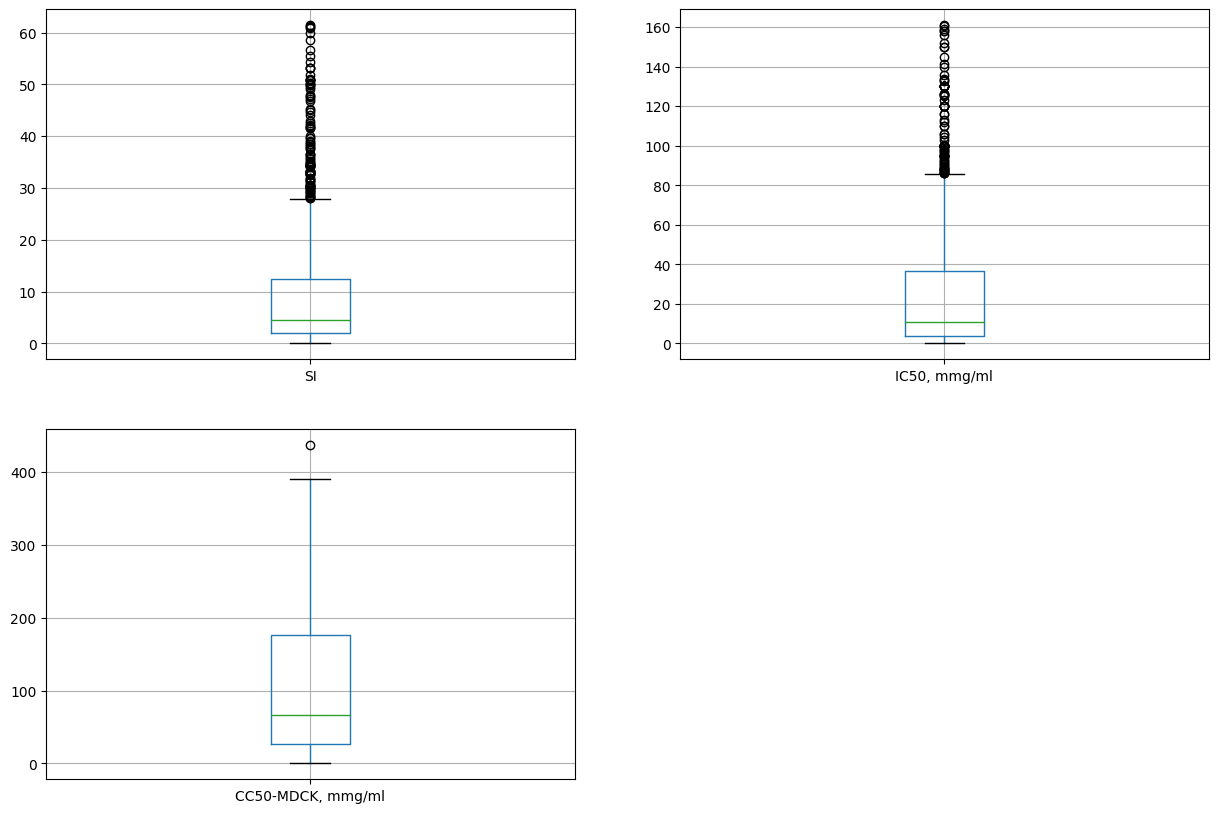

In [314]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
ax = df.boxplot(['SI'])
plt.subplot(2,2,2)
ax = df.boxplot(['IC50, mmg/ml'])
plt.subplot(2,2,3)
ax = df.boxplot(['CC50-MDCK, mmg/ml'])

### Векторизация

In [270]:
from sklearn.preprocessing import FunctionTransformer

In [271]:
dir(Descriptors)

['AUTOCORR2D_1',
 'AUTOCORR2D_10',
 'AUTOCORR2D_100',
 'AUTOCORR2D_101',
 'AUTOCORR2D_102',
 'AUTOCORR2D_103',
 'AUTOCORR2D_104',
 'AUTOCORR2D_105',
 'AUTOCORR2D_106',
 'AUTOCORR2D_107',
 'AUTOCORR2D_108',
 'AUTOCORR2D_109',
 'AUTOCORR2D_11',
 'AUTOCORR2D_110',
 'AUTOCORR2D_111',
 'AUTOCORR2D_112',
 'AUTOCORR2D_113',
 'AUTOCORR2D_114',
 'AUTOCORR2D_115',
 'AUTOCORR2D_116',
 'AUTOCORR2D_117',
 'AUTOCORR2D_118',
 'AUTOCORR2D_119',
 'AUTOCORR2D_12',
 'AUTOCORR2D_120',
 'AUTOCORR2D_121',
 'AUTOCORR2D_122',
 'AUTOCORR2D_123',
 'AUTOCORR2D_124',
 'AUTOCORR2D_125',
 'AUTOCORR2D_126',
 'AUTOCORR2D_127',
 'AUTOCORR2D_128',
 'AUTOCORR2D_129',
 'AUTOCORR2D_13',
 'AUTOCORR2D_130',
 'AUTOCORR2D_131',
 'AUTOCORR2D_132',
 'AUTOCORR2D_133',
 'AUTOCORR2D_134',
 'AUTOCORR2D_135',
 'AUTOCORR2D_136',
 'AUTOCORR2D_137',
 'AUTOCORR2D_138',
 'AUTOCORR2D_139',
 'AUTOCORR2D_14',
 'AUTOCORR2D_140',
 'AUTOCORR2D_141',
 'AUTOCORR2D_142',
 'AUTOCORR2D_143',
 'AUTOCORR2D_144',
 'AUTOCORR2D_145',
 'AUTOCORR2D_146',


In [315]:
def mol_dsc_calc(mols):
    return pd.DataFrame({k: f(Chem.MolFromSmiles(m)) for k, f in descriptors.items()} for m in mols)

# список конституционных и физико-химических дескрипторов из библиотеки RDKit
descriptors = {"HeavyAtomCount": Descriptors.HeavyAtomCount,
               "NHOHCount": Descriptors.NHOHCount,
               "NOCount": Descriptors.NOCount,
               "NumHAcceptors": Descriptors.NumHAcceptors,
               "NumHDonors": Descriptors.NumHDonors,
               "NumHeteroatoms": Descriptors.NumHeteroatoms,
               "NumRotatableBonds": Descriptors.NumRotatableBonds,
               "NumValenceElectrons": Descriptors.NumValenceElectrons,
               "NumAromaticRings": Descriptors.NumAromaticRings,
               "NumAliphaticHeterocycles": Descriptors.NumAliphaticHeterocycles,
               "RingCount": Descriptors.RingCount,
               "MW": Descriptors.MolWt,
               "LogP": Descriptors.MolLogP,
               "MR": Descriptors.MolMR,
               "TPSA": Descriptors.TPSA,
               'fr_Al_COO': Descriptors.fr_Al_COO,
                'fr_Al_OH': Descriptors.fr_Al_OH,
                'fr_ArN': Descriptors.fr_ArN,
                'fr_Ar_COO': Descriptors.fr_Ar_COO,
                'fr_Ar_N':  Descriptors.fr_Ar_N,
                'fr_Ar_NH':Descriptors.fr_Ar_NH,
                'fr_Ar_OH':Descriptors.fr_Ar_OH,
                'fr_COO':Descriptors.fr_COO,
                'fr_COO2':Descriptors.fr_COO2,
                'fr_C_O': Descriptors.fr_C_O,
                'fr_C_O_noCOO': Descriptors.fr_C_O_noCOO,
                'fr_C_S': Descriptors.fr_C_S,
                'fr_HOCCN': Descriptors.fr_HOCCN,
                'fr_Imine': Descriptors.fr_Imine,
                'fr_NH0': Descriptors.fr_NH0,
                'fr_NH1': Descriptors.fr_NH1,
                'fr_NH2': Descriptors.fr_NH2,
                'fr_N_O': Descriptors.fr_N_O,
                'fr_Ndealkylation1': Descriptors.fr_Ndealkylation1,
                'fr_Ndealkylation2': Descriptors.fr_Ndealkylation2,
                'fr_Nhpyrrole': Descriptors.fr_Nhpyrrole,
                'fr_SH': Descriptors.fr_SH,
                'fr_aldehyde': Descriptors.fr_aldehyde,
                'fr_alkyl_carbamate': Descriptors.fr_alkyl_carbamate,
                'fr_alkyl_halide': Descriptors.fr_alkyl_halide,
                'fr_allylic_oxid': Descriptors.fr_allylic_oxid,
                'fr_amide': Descriptors.fr_amide,
                'fr_amidine': Descriptors.fr_amidine,
                'fr_aniline': Descriptors.fr_aniline,
                'fr_aryl_methyl': Descriptors.fr_aryl_methyl,
                'fr_azide': Descriptors.fr_azide,
                'fr_azo':Descriptors.fr_azo,
                'fr_barbitur':Descriptors.fr_barbitur,
                'fr_benzene':Descriptors.fr_benzene,
                'fr_benzodiazepine':Descriptors.fr_benzodiazepine,
                'fr_bicyclic':Descriptors.fr_bicyclic,
                'fr_diazo':Descriptors.fr_diazo,
                'fr_dihydropyridine':Descriptors.fr_dihydropyridine,
                'fr_epoxide':Descriptors.fr_epoxide,
                'fr_ester':Descriptors.fr_ester,
                'fr_ether':Descriptors.fr_ether,
                'fr_furan':Descriptors.fr_furan,
                'fr_guanido':Descriptors.fr_guanido,
                'fr_halogen':Descriptors.fr_halogen,
                'fr_hdrzine':Descriptors.fr_hdrzine,
                'fr_hdrzone':Descriptors.fr_hdrzone,
                'fr_imidazole':Descriptors.fr_imidazole,
                'fr_imide':Descriptors.fr_imide,
                'fr_isocyan':Descriptors.fr_isocyan,
                'fr_isothiocyan':Descriptors.fr_isothiocyan,
                'fr_ketone':Descriptors.fr_ketone,
                'fr_ketone_Topliss':Descriptors.fr_ketone_Topliss,
                'fr_lactam':Descriptors.fr_lactam,
                'fr_lactone':Descriptors.fr_lactone,
                'fr_methoxy':Descriptors.fr_methoxy,
                'fr_morpholine':Descriptors.fr_morpholine,
                'fr_nitrile':Descriptors.fr_nitrile,
                'fr_nitro':Descriptors.fr_nitro,
                'fr_nitro_arom':Descriptors.fr_nitro_arom,
                'fr_nitro_arom_nonortho':Descriptors.fr_nitro_arom_nonortho,
                'fr_nitroso':Descriptors.fr_nitroso,
                'fr_oxazole':Descriptors.fr_oxazole,
                'fr_oxime':Descriptors.fr_oxime,
                'fr_para_hydroxylation':Descriptors.fr_para_hydroxylation,
                'fr_phenol':Descriptors.fr_phenol,
                'fr_phos_acid':Descriptors.fr_phos_acid,
                'fr_phos_ester':Descriptors.fr_phos_ester,
                'fr_piperdine':Descriptors.fr_piperdine,
                'fr_piperzine':Descriptors.fr_piperzine,
                'fr_priamide':Descriptors.fr_priamide,
                'fr_prisulfonamd':Descriptors.fr_prisulfonamd,
                'fr_pyridine':Descriptors.fr_pyridine,
                'fr_quatN':Descriptors.fr_quatN,
                'fr_sulfide':Descriptors.fr_sulfide,
                'fr_sulfonamd':Descriptors.fr_sulfonamd,
                'fr_sulfone':Descriptors.fr_sulfone,
                'fr_term_acetylene':Descriptors.fr_term_acetylene,
                'fr_tetrazole':Descriptors.fr_tetrazole,
                'fr_thiazole':Descriptors.fr_thiazole,
                'fr_thiocyan':Descriptors.fr_thiocyan,
                'fr_thiophene':Descriptors.fr_thiophene,
                'fr_unbrch_alkane':Descriptors.fr_unbrch_alkane,
                'fr_urea':Descriptors.fr_urea,
                'fr_phenol_noOrthoHbond':Descriptors.fr_phenol_noOrthoHbond
                }

# sklearn трансформер для использования в конвейерном моделировании
descriptors_transformer = FunctionTransformer(mol_dsc_calc)
X_des = descriptors_transformer.transform(df['SMILES'])
X_des.head()

,HeavyAtomCount,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,fr_phenol_noOrthoHbond
0,18,0,2,2,0,2,5,104,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,0,3,3,0,3,3,98,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46,0,4,2,0,4,21,266,0,0,...,0,0,0,0,0,0,0,7,0,0
3,34,0,6,6,0,6,9,190,0,0,...,0,0,0,0,0,0,0,2,0,0
4,32,2,8,8,2,8,2,160,2,2,...,0,0,0,0,0,0,0,0,0,1


In [273]:
X_des.shape

(980, 99)

In [274]:
import xgboost as xgb

In [275]:
df.columns

Index(['molecule', 'SMILES', 'IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI',
       '#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG',
       'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA',
       'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob',
       'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS',
       'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp',
       'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption',
       'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO',
       'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm',
       'Molecular weight', 'Hydrogen bond acceptors', 'Hydrogen bond donors',
       'Polar SA'],
      dtype='object')

In [317]:
df_des = pd.concat([df.drop(['SMILES'], axis = 1),X_des], axis = 1)

In [318]:
df_des = df_des.dropna(subset=['CNS'])
df_des = df_des.dropna(subset=['fr_thiocyan'])

In [319]:
df_des.isna().sum()

molecule                  0
IC50, mmg/ml              0
CC50-MDCK, mmg/ml         0
SI                        0
#stars                    0
                         ..
fr_thiocyan               0
fr_thiophene              0
fr_unbrch_alkane          0
fr_urea                   0
fr_phenol_noOrthoHbond    0
Length: 156, dtype: int64

In [251]:
import shap

In [320]:
def search(df_des, criteria):
        X, y = df_des.drop(columns=['IC50, mmg/ml', 'CC50-MDCK, mmg/ml','molecule','SI']), df_des[criteria]
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=42)
        params = {
                "objective": "reg:squarederror",
                "n_estimators":100,
                "max_depth": 4,
                "learning_rate": 0.01,
                "subsample": 0.8,
                "colsample_bytree": 0.9,
                "colsample_bylevel": 0.8,
                "reg_lambda": 0.1,
                "eval_metric": "rmse",
                "random_state": 42,
                }
        reg = xgb.XGBRegressor(**params)
        reg.fit(X_train,
                y_train,
                verbose=False,
                eval_set= [(X_train, y_train), (X_test, y_test)],
                )
        explainer = shap.TreeExplainer(reg)
        shap_values = explainer.shap_values(X_test)
        shap.initjs()
        shap.summary_plot(shap_values,
                  X_test, plot_type="bar", plot_size = (5,5), title = 'Features importance for ' + criteria)
        print(criteria + " without descriptor choosing")
        print("R2-score on train datas", reg.score(X_train, y_train, sample_weight=None))
        print("R2-score on test datas", reg.score(X_test, y_test, sample_weight=None))
        results = reg.evals_result()
        print("RMSE", results['validation_1']['rmse'][-1])

### "SI"

[22:54:19] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


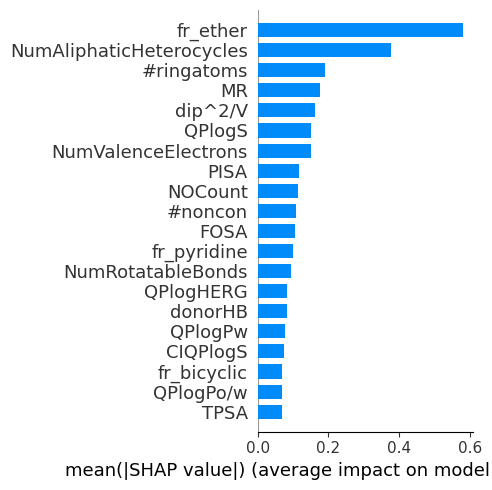

SI without descriptor choosing
R2-score on train datas 0.32712279373936115
R2-score on test datas 0.035896733965685046
RMSE 11.939066758200598


In [321]:
search(df_des, 'SI')

#### CC50

[22:54:25] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


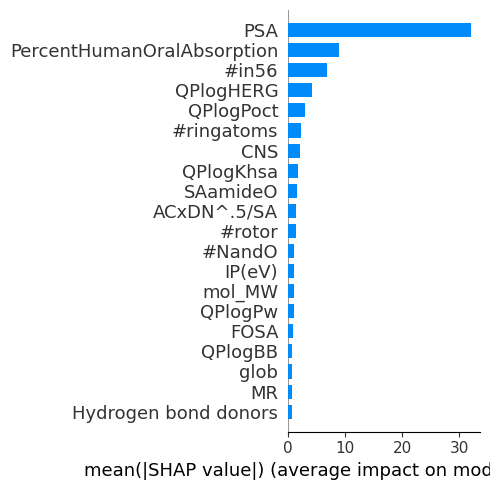

CC50-MDCK, mmg/ml without descriptor choosing
R2-score on train datas 0.5882033211554107
R2-score on test datas 0.3142341038444949
RMSE 95.66945518081913


In [322]:
search(df_des, 'CC50-MDCK, mmg/ml')

#### IC50

[22:54:30] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


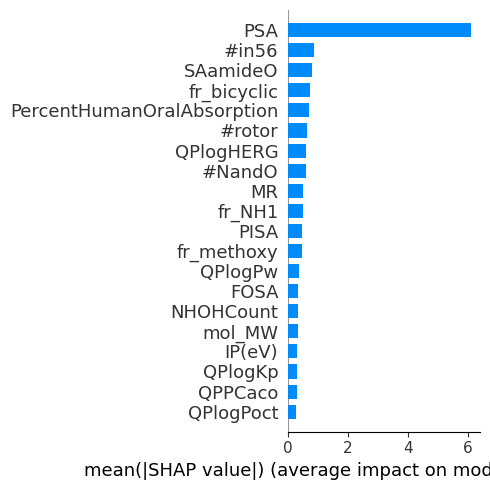

IC50, mmg/ml without descriptor choosing
R2-score on train datas 0.43068834603511397
R2-score on test datas 0.14012806842807757
RMSE 35.047915935499255


In [323]:
search(df_des, 'IC50, mmg/ml')

### Корректировка данных

##### SI

In [324]:
SI_params = ['#ringatoms', 'dip^2/V',
             'QPlogS', 'PISA', '#noncon',
             'FOSA', 'QPlogHERG','donorHB',
             'IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI']

In [325]:
def mol_dsc_calc_SI(mols):
    return pd.DataFrame({k: f(Chem.MolFromSmiles(m)) for k, f in descriptors.items()} for m in mols)

# список конституционных и физико-химических дескрипторов из библиотеки RDKit
descriptors = {
                "NumAliphaticHeterocycles": Descriptors.NumAliphaticHeterocycles,
                "MR": Descriptors.MolMR,
                "NumValenceElectrons": Descriptors.NumValenceElectrons,
                "NOCount": Descriptors.NOCount,
                'fr_pyridine':Descriptors.fr_pyridine,
                "NumRotatableBonds": Descriptors.NumRotatableBonds,
                'fr_ether':Descriptors.fr_ether
            }

# sklearn трансформер для использования в конвейерном моделировании
descriptors_transformer = FunctionTransformer(mol_dsc_calc)
X_des = descriptors_transformer.transform(df['SMILES'])
X_des.head()

,NumAliphaticHeterocycles,MR,NumValenceElectrons,NOCount,fr_pyridine,NumRotatableBonds,fr_ether
0,0,79.3190,104,2,0,5,0
1,0,67.6630,98,3,0,3,1
2,0,202.1508,266,4,0,21,0
3,0,134.2140,190,6,0,9,2
4,2,111.4221,160,8,1,2,2


In [326]:
df_des = pd.concat([df.drop(['SMILES'], axis = 1),X_des], axis = 1)
df_des = df_des.dropna(subset=['CNS'])
df_des = df_des.dropna(subset=['fr_pyridine'])

In [327]:
df_des.isna().sum()

molecule               0
IC50, mmg/ml           0
CC50-MDCK, mmg/ml      0
SI                     0
#stars                 0
                      ..
NumValenceElectrons    0
NOCount                0
fr_pyridine            0
NumRotatableBonds      0
fr_ether               0
Length: 64, dtype: int64

In [328]:
df_des.columns

Index(['molecule', 'IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI', '#stars',
       '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG', 'CNS',
       'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA', 'volume',
       'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob', 'QPpolrz',
       'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS', 'CIQPlogS',
       'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp', 'IP(eV)',
       'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption',
       'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO',
       'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm',
       'Molecular weight', 'Hydrogen bond acceptors', 'Hydrogen bond donors',
       'Polar SA', 'NumAliphaticHeterocycles', 'MR', 'NumValenceElectrons',
       'NOCount', 'fr_pyridine', 'NumRotatableBonds', 'fr_ether'],
      dtype='object')

In [329]:
df_SI = df_des[SI_params]

In [330]:
df_SI = df_SI.dropna(subset='SI')

In [341]:
def search_Scale(df, criteria):
        X, y = df.drop(columns=['IC50, mmg/ml', 'CC50-MDCK, mmg/ml','SI']), df[criteria]
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=42)
        params = {
                "objective": "reg:squarederror",
                "n_estimators":100,
                "max_depth": 4,
                "learning_rate": 0.01,
                "subsample": 0.8,
                "colsample_bytree": 0.9,
                "colsample_bylevel": 0.8,
                "reg_lambda": 0.1,
                "eval_metric": "rmse",
                "random_state": 42,
                }
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        reg = xgb.XGBRegressor(**params)
        reg.fit(X_train,
                y_train,
                verbose=False,
                eval_set= [(X_train, y_train), (X_test, y_test)],
                )
        explainer = shap.TreeExplainer(reg)
        shap_values = explainer.shap_values(X_test)
        shap.initjs()
        shap.summary_plot(shap_values,
                  X_test, plot_type="bar", plot_size = (5,5), title = 'Features importance for ' + criteria)
        print(criteria + ' after descriptors choosing')
        print("R2-score on train datas", reg.score(X_train, y_train, sample_weight=None))
        print("R2-score on test datas", reg.score(X_test, y_test, sample_weight=None))
        results = reg.evals_result()
        print("RMSE", results['validation_1']['rmse'][-1])

[22:55:04] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


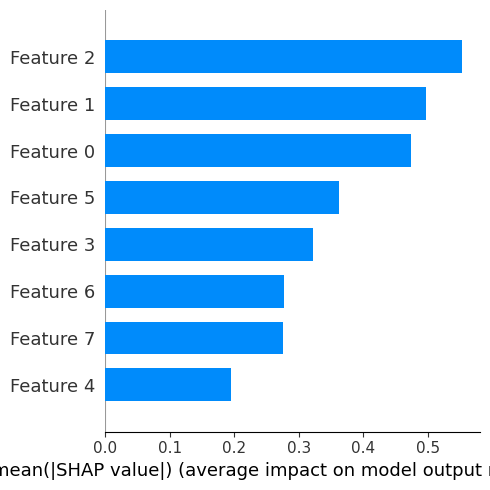

SI after descriptors choosing
R2-score on train datas 0.26135277080699737
R2-score on test datas 0.0719746149104522
RMSE 11.71354977692042


In [332]:
search_Scale(df_SI, 'SI')

##### CC50

In [337]:
CC_params = ['PSA', '#in56','PercentHumanOralAbsorption','QPlogHERG', 'QPlogPoct','#ringatoms', 'CNS', 'QPlogKhsa', 'SAamideO',
             'ACxDN^.5/SA', '#rotor', '#NandO', 'IP(eV)', 'mol_MW', 'QPlogPw', 'IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI']

In [336]:
df_des = df.drop(['SMILES'], axis = 1)
df_des = df_des.dropna(subset=['CNS'])

In [338]:
df_CC = df_des[CC_params]

[23:06:30] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


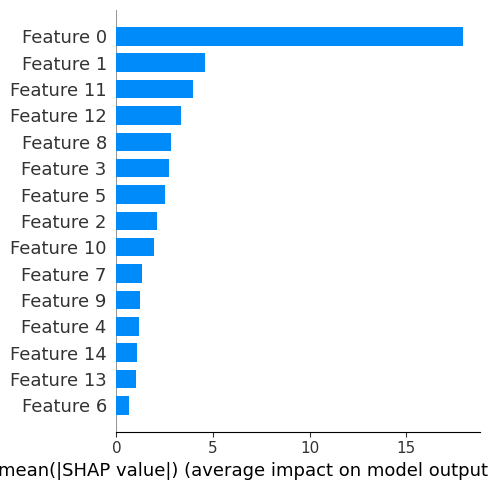

CC50-MDCK, mmg/ml after descriptors choosing
R2-score on train datas 0.4013239563087174
R2-score on test datas 0.2714891598917373
RMSE 92.18982354873377


In [342]:
search_Scale(df_CC, 'CC50-MDCK, mmg/ml')

IC50

In [343]:
IC_params = ['PSA', '#in56', 'SAamideO', 'PercentHumanOralAbsorption', '#rotor', 'QPlogHERG', '#NandO', 'PISA', 'QPlogPw','FOSA',
             'IC50, mmg/ml', 'CC50-MDCK, mmg/ml', 'SI']

In [344]:
def mol_dsc_calc_IC(mols):
    return pd.DataFrame({k: f(Chem.MolFromSmiles(m)) for k, f in descriptors.items()} for m in mols)

# список конституционных и физико-химических дескрипторов из библиотеки RDKit
descriptors = {
                "MR": Descriptors.MolMR,
                'fr_bicyclic':Descriptors.fr_bicyclic,
                'fr_NH1': Descriptors.fr_NH1,
                'fr_methoxy':Descriptors.fr_methoxy,
                "NHOHCount": Descriptors.NHOHCount
                }

# sklearn трансформер для использования в конвейерном моделировании
descriptors_transformer = FunctionTransformer(mol_dsc_calc)
X_des = descriptors_transformer.transform(df['SMILES'])
X_des.head()

,MR,fr_bicyclic,fr_NH1,fr_methoxy,NHOHCount
0,79.3190,2,0,0,0
1,67.6630,2,0,0,0
2,202.1508,4,0,0,0
3,134.2140,4,0,0,0
4,111.4221,5,0,0,2


In [345]:
df_des = pd.concat([df.drop(['SMILES'], axis = 1),X_des], axis = 1)
df_des = df_des.dropna(subset=['CNS'])
df_des = df_des.dropna(subset=['fr_methoxy'])

In [346]:
df_des.isna().sum()

molecule             0
IC50, mmg/ml         0
CC50-MDCK, mmg/ml    0
SI                   0
#stars               0
                    ..
MR                   0
fr_bicyclic          0
fr_NH1               0
fr_methoxy           0
NHOHCount            0
Length: 62, dtype: int64

In [348]:
df_IC = df_des[IC_params]
df_IC = df_SI.dropna(subset='SI')

[23:19:53] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


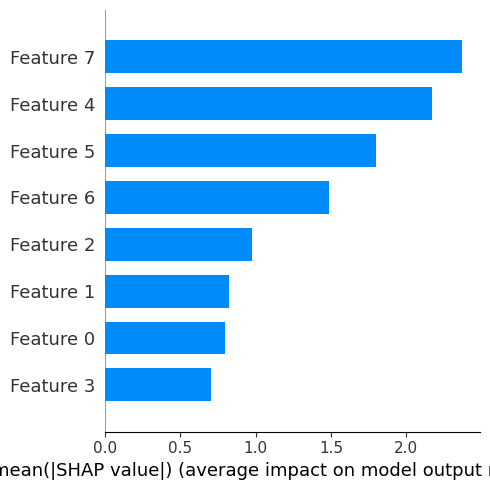

IC50, mmg/ml after descriptors choosing
R2-score on train datas 0.2805266401764268
R2-score on test datas 0.09633596478260764
RMSE 35.92930486437004


In [349]:
search_Scale(df_IC, 'IC50, mmg/ml')

Text(0.5, 1.0, 'Correlation matrix between SI parameters')

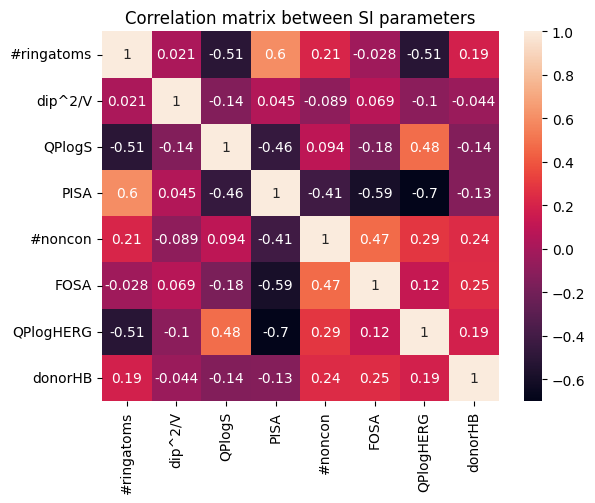

In [366]:
ax = sns.heatmap(df_SI.drop(columns=['IC50, mmg/ml', 'CC50-MDCK, mmg/ml','SI']).corr(), annot=True)
plt.title('Correlation matrix between SI parameters')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07, .1, .12], #so called `eta` value
              'max_depth': [5, 6, 7, 8, 9, 10],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [ ]:
xgb_grid = GridSearchCV(reg,
                        grid_parameters,
                        cv = 2,
                        scoring = 'neg_root_mean_squared_error',
                        n_jobs = -1)

In [ ]:
xgb_grid.fit(X_train,
         y_train)

C:\Users\tmans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning:

[21:57:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\tmans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning:

[21:57:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=0.8,
                                    colsample_bynode=None, colsample_bytree=0.9,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.01, m...
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07, 0.1, 0.12],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_child_weight': [4], 'n_estimators': [500],
                         'nthread': [4], 'objective': ['reg:linear'],
                         'silent': [1], 'subsample': [0.7]},
             scoring='neg_root_mean_squared_error')

In [ ]:
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
-109.62461554801153
